#### This code implements a PID control algorithm

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [31]:
# Jupyter notebook magic for matplotlib
%matplotlib notebook

In [32]:
class PIDcontrol():
    def __init__(self, kp, ki, kd):
        # Initialize the PID control class
        self.processval = 0.0
        self.controlvar = 0.0
        self.setpoint = 0.0
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.error = 0.0
        self.prop_term = 0.0
        self.inte_term = 0.0
        self.deri_term = 0.0
        self.lasterr = 0.0
        self.samplingtime = 0.005  # seconds
        self.currenttime = time.time()
        self.lasttime = self.currenttime
        self.winduplim = 20.0
        self.maxsetpoint = 10.0

    def main(self):
        # Setup plots
        timesteps = 60
        timepoints = []
        outputs = []
        setpoints = []
        errors = []
        x = [timepoints, timepoints]
        y = [outputs, setpoints]
        
        plt.ion()
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(121)
        ax2 = fig1.add_subplot(122)
        fig1.show()
        fig1.tight_layout()
        fig1.canvas.draw()
        axrange = [0, timesteps * self.samplingtime]
        
        for nn in range(timesteps):
            ax1.clear()
            ax2.clear()
            if self.setpoint > 0:
                self.processval = self.processval + (self.controlvar - (1.0 / nn))
                
#             if nn < 10:
#                 self.setpoint = self.maxsetpoint * nn / 10
#             else:
#                 self.setpoint = self.maxsetpoint
#             if nn < 10:
#                 self.setpoint = 2.0 * self.maxsetpoint * nn / 10
#             elif (nn >= 10) and (nn < 20):
#                 self.setpoint = 2.0 * self.maxsetpoint - self.maxsetpoint * (nn - 10) / 10
#             else:
#                 self.setpoint = self.maxsetpoint
            if nn > 10:
                self.setpoint = self.maxsetpoint
#             self.setpoint = self.maxsetpoint * np.sin(4 * np.pi * nn / timesteps)
    
            outputs.append(self.processval)
            timepoints.append(nn * self.samplingtime)
            setpoints.append(self.setpoint)
            errors.append(self.error)
            
            ax1.plot(timepoints, outputs)
            ax1.plot(timepoints, setpoints)
            ax2.plot(timepoints, errors)
            ax1.set_xlim(axrange)
            ax2.set_xlim(axrange)
            ax1.set_xlabel('time')
            ax1.set_ylabel('value (arb. values)')
            ax2.set_xlabel('time')
            ax2.set_ylabel('error')
            fig1.canvas.draw()
            fig1.tight_layout()
            
            time.sleep(self.samplingtime)
            self.update()

    def update(self):
        # Generate output using PID control algorithm
        self.error = self.setpoint - self.processval
        self.currenttime = time.time()
        dt = self.currenttime - self.lasttime
        if dt > self.samplingtime:
            self.prop_term = self.kp * self.error
            self.inte_term = self.inte_term + self.ki * self.error * dt
            if self.inte_term < -self.winduplim:
                self.inte_term = -self.winduplim
            elif self.inte_term > self.winduplim:
                self.inte_term = self.winduplim
            self.deri_term = self.kd * (self.error - self.lasterr) / dt
            self.controlvar = self.prop_term + self.inte_term + self.deri_term
            self.lasterr = self.error
            self.lasttime = self.currenttime

<IPython.core.display.Javascript object>


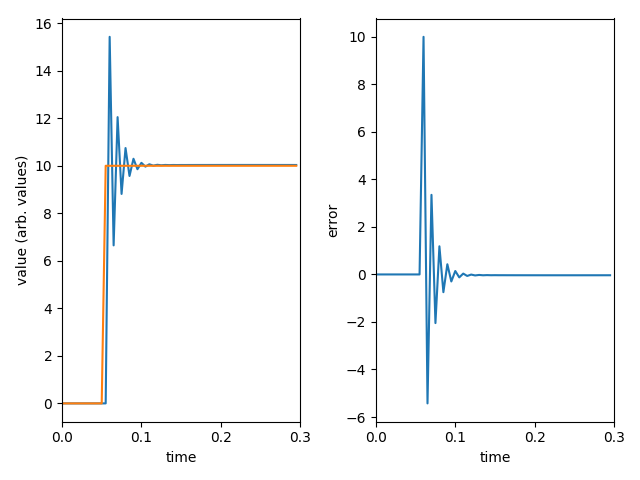

In [33]:
pid = PIDcontrol(1.5, 0.1, 0.005)
pid.main()